In [1]:
# importing necessary libraries and configurations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

plt.style.use("seaborn")
%matplotlib inline

In [2]:
# loading the data set
df = pd.read_csv("df_05.csv")

In [3]:
# data cleaning and indexing 
df.drop("zip_code", axis=1, inplace=True)

df.occurred_date_time = df.occurred_date_time.astype("datetime64")
df.set_index(["occurred_date_time"], inplace=True)
df.sort_index(inplace=True)

# examining the new data frame
display(df.head())
display(df.tail())

highest_offense_description     report_date_time  \
occurred_date_time                                                     
2003-01-01 00:01:00         BURGLARY OF VEHICLE  2003-01-02 14:54:00   
2003-01-01 01:25:00         PUBLIC INTOXICATION  2003-01-01 01:25:00   
2003-01-01 02:08:00                         DWI  2003-01-01 02:08:00   
2003-01-01 02:44:00                         DWI  2003-01-01 03:07:00   
2003-01-01 02:45:00         ASSAULT WITH INJURY  2003-01-01 02:45:00   

                                    location_type                  address  \
occurred_date_time                                                           
2003-01-01 00:01:00         PARKING LOTS / GARAGE             2900 COLE ST   
2003-01-01 01:25:00         PARKING LOTS / GARAGE        2021 GUADALUPE ST   
2003-01-01 02:08:00  STREETS / HWY / ROAD / ALLEY          3500 N IH 35 SB   
2003-01-01 02:44:00  STREETS / HWY / ROAD / ALLEY  2000 BLOCK GUADALUPE ST   
2003-01-01 02:45:00              RESIDENCE / HOME       2728 RIO GRANDE ST   

                     council_district apd_sector apd_district  \
occurred_date_time                                              
2003-01-01 00:01:00               9.0         BA            1   
2003-01-01 01:25:00               9.0         BA            1   
2003-01-01 02:08:00               9.0         BA            1   
2003-01-01 02:44:00               9.0         BA            1   
2003-01-01 02:45:00               9.0         BA            3   

                    clearance_status       clearance_date   latitude  \
occurred_date_time                                                     
2003-01-01 00:01:00                N                  NaN  30.287795   
2003-01-01 01:25:00                C  2003-01-01 00:00:00  30.283460   
2003-01-01 02:08:00                C  2003-01-01 00:00:00  30.292694   
2003-01-01 02:44:00                C  2003-02-11 00:00:00  30.282842   
2003-01-01 02:45:00                O  2003-01-09 00:00:00  30.293177   

                     longitude  year  month  week  day  hour  
occurred_date_time                                            
2003-01-01 00:01:00 -97.725294  2003      1     1    1     0  
2003-01-01 01:25:00 -97.741275  2003      1     1    1     1  
2003-01-01 02:08:00 -97.721123  2003      1     1    1     2  
2003-01-01 02:44:00 -97.742397  2003      1     1    1     2  
2003-01-01 02:45:00 -97.744674  2003      1     1    1     2

highest_offense_description     report_date_time  \
occurred_date_time                                                       
2020-12-03 22:16:00        BURGLARY NON RESIDENCE  2020-12-03 22:16:00   
2020-12-04 21:43:00            FAMILY DISTURBANCE  2020-12-04 21:43:00   
2020-12-05 00:00:00           BURGLARY OF VEHICLE  2020-12-05 16:50:00   
2020-12-05 16:32:00            DATING DISTURBANCE  2020-12-05 16:32:00   
2020-12-05 18:20:00  POSS CONTROLLED SUB/NARCOTIC  2020-12-05 18:20:00   

                                          location_type  \
occurred_date_time                                        
2020-12-03 22:16:00  DRUG STORE / DR. OFFICE / HOSPITAL   
2020-12-04 21:43:00        STREETS / HWY / ROAD / ALLEY   
2020-12-05 00:00:00               PARKING LOTS / GARAGE   
2020-12-05 16:32:00                    RESIDENCE / HOME   
2020-12-05 18:20:00        STREETS / HWY / ROAD / ALLEY   

                                              address  council_district  \
occurred_date_time                                                        
2020-12-03 22:16:00                     711 W 38TH ST               9.0   
2020-12-04 21:43:00  910 W MARTIN LUTHER KING JR BLVD               9.0   
2020-12-05 00:00:00                2707 RIO GRANDE ST               9.0   
2020-12-05 16:32:00                   3400 HARMON AVE               9.0   
2020-12-05 18:20:00             3200 BLOCK N IH 35 SB               9.0   

                    apd_sector apd_district clearance_status  \
occurred_date_time                                             
2020-12-03 22:16:00         BA            3              NaN   
2020-12-04 21:43:00         BA            2              NaN   
2020-12-05 00:00:00         BA            1              NaN   
2020-12-05 16:32:00         BA            1              NaN   
2020-12-05 18:20:00         BA            1                C   

                          clearance_date   latitude  longitude  year  month  \
occurred_date_time                                                            
2020-12-03 22:16:00                  NaN  30.303573 -97.740976  2020     12   
2020-12-04 21:43:00                  NaN  30.283712 -97.747761  2020     12   
2020-12-05 00:00:00                  NaN  30.292392 -97.743919  2020     12   
2020-12-05 16:32:00                  NaN  30.292466 -97.722752  2020     12   
2020-12-05 18:20:00  2020-12-05 00:00:00  30.290473 -97.722559  2020     12   

                     week  day  hour  
occurred_date_time                    
2020-12-03 22:16:00    49    3    22  
2020-12-04 21:43:00    49    4    21  
2020-12-05 00:00:00    49    5     0  
2020-12-05 16:32:00    49    5    16  
2020-12-05 18:20:00    49    5    18

In [5]:
# Creating violent crime and murder data frames for analysis
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')
df_mur = df[df.highest_offense_description == "MURDER"]
df_mur_cap = df[df.highest_offense_description == "CAPITAL MURDER"]
df_agg_asslt = df[df.highest_offense_description == "AGG ASSAULT"]
df_agg_robbery = df[df.highest_offense_description == "AGG ROBBERY/DEADLY WEAPON"]
df_rape = df[df.highest_offense_description == "RAPE"]


# Annual overall crime (2017-present)
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime (2017-present)
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders (2017-present)
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]

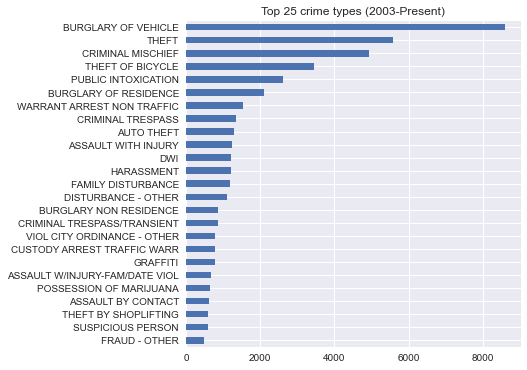

----------------------------------------------------------
----------------------------------------------------------


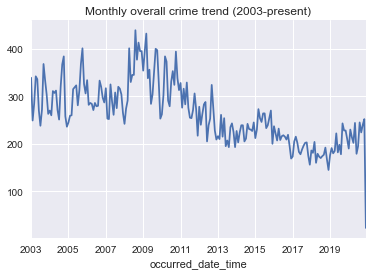

To make the graph easier to read...


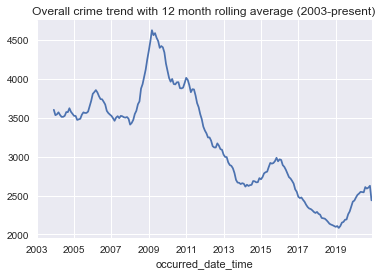

----------------------------------------------------------
----------------------------------------------------------


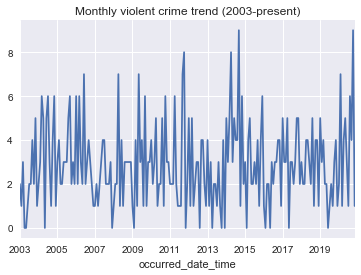

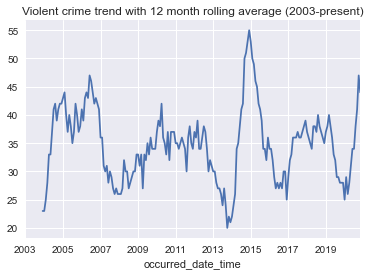

In [6]:
# Top 25 crime types
df.highest_offense_description.value_counts().head(25).sort_values().plot.barh(
    figsize=(6, 6), title="Top 25 crime types (2003-Present)"
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

df.resample("M").size().plot(
    title="Monthly overall crime trend (2003-present)",  # figsize=(8, 5)
)
plt.show()

print("To make the graph easier to read...")

# Violent crime trend with a year rolling average
df.resample("M").size().rolling(12).sum().plot(
    title="Overall crime trend with 12 month rolling average (2003-present)",
    # figsize=(8, 5),
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

# Plotting violent crime trend on a monthly basis
df_viol.resample("M").size().plot(
    title="Monthly violent crime trend (2003-present)",  # figsize=(8, 5)
)
plt.show()

# Violent crime trend with a year rolling average
df_viol.resample("M").size().rolling(12).sum().plot(
    title="Violent crime trend with 12 month rolling average (2003-present)",
    # figsize=(8, 5),
)
plt.show()

I plotted the data with a rolling average in order to make it more readable.


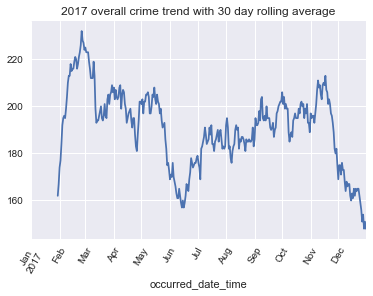

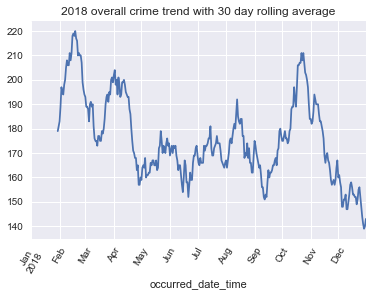

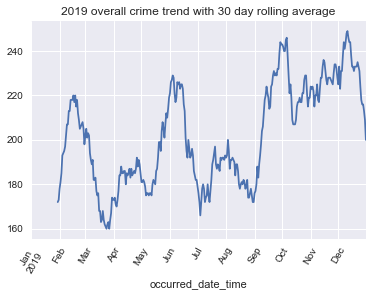

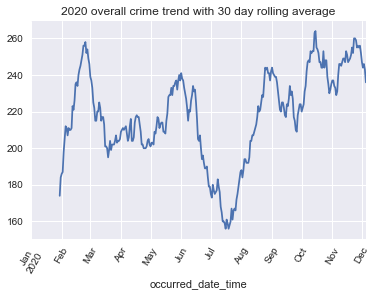

In [7]:
print("I plotted the data with a rolling average in order to make it more readable.")

df_17.resample("D").size().rolling(30).sum().plot(
    # fontsize=12,
    # figsize=(8, 5),
    rot=60,
    title="2017 overall crime trend with 30 day rolling average",
)
plt.show()

print("==============================================================================")
print("==============================================================================")

df_18.resample("D").size().rolling(30).sum().plot(
    # fontsize=12,
    # figsize=(8, 5),
    rot=60,
    title="2018 overall crime trend with 30 day rolling average",
)
plt.show()

print("==============================================================================")
print("==============================================================================")

df_19.resample("D").size().rolling(30).sum().plot(
    # fontsize=12,
    # figsize=(8, 5),
    rot=60,
    title="2019 overall crime trend with 30 day rolling average",
)
plt.show()

print("==============================================================================")
print("==============================================================================")

df_20.resample("D").size().rolling(30).sum().plot(
    # fontsize=12,
    # figsize=(8, 5),
    rot=60,
    title="2020 overall crime trend with 30 day rolling average",
)
plt.show()

# ax = df_20.plot(x="year", figsize=(10, 6), label="overall crime")
# df_viol_20.plot(x="year", label="violent crime", ax=ax, rot=60)
# plt.show()

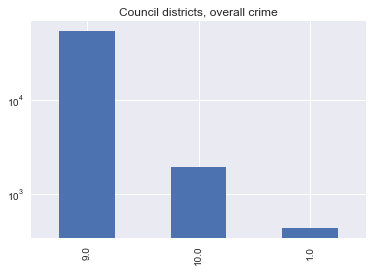

----------------------------------------------------------
----------------------------------------------------------


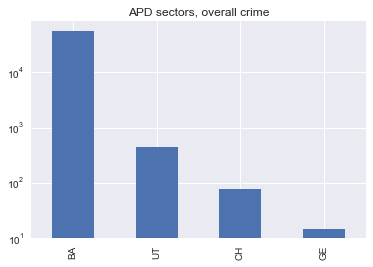

----------------------------------------------------------
----------------------------------------------------------


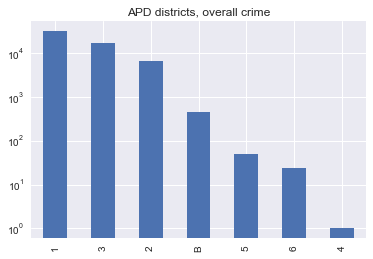

In [8]:
# Showing overall crime rates by council districts, APD districts, and sectors
df.council_district.value_counts().plot.bar(
    title="Council districts, overall crime", logy=True
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

df.apd_sector.value_counts().plot.bar(title="APD sectors, overall crime", logy=True)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

df.apd_district.value_counts().plot.bar(title="APD districts, overall crime", logy=True)
plt.show()

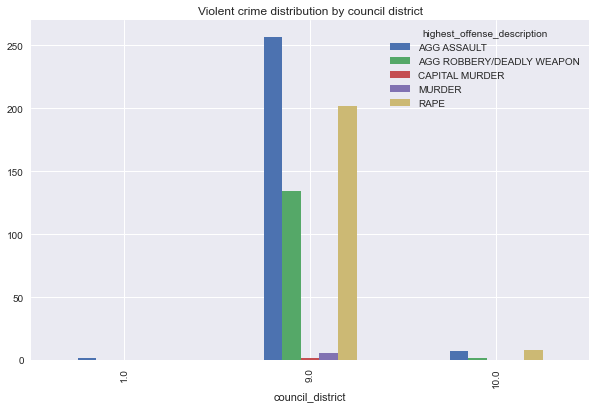

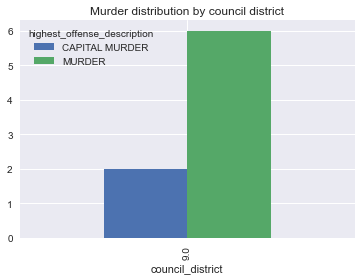

----------------------------------------------------------
----------------------------------------------------------


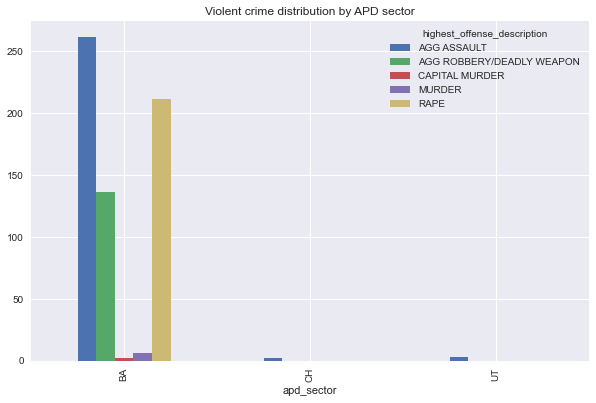

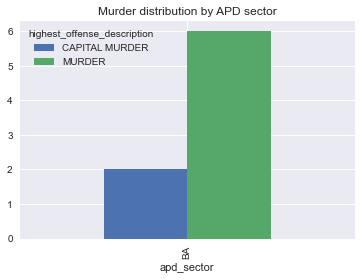

----------------------------------------------------------
----------------------------------------------------------


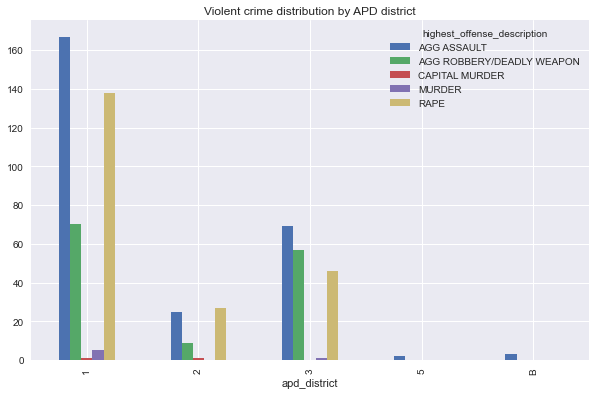

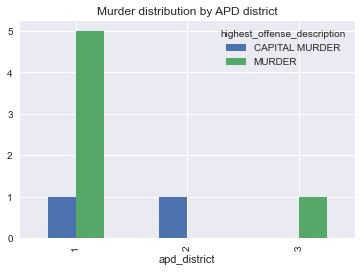

In [9]:
# Showing violent crime and murder rates by council districts, APD districts, and sectors
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(10, 6.25),
    # logy=True,
    title="Violent crime distribution by council district",
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(title="Murder distribution by council district")
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(10, 6.25), title="Violent crime distribution by APD sector"  # logy=True,
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    title="Murder distribution by APD sector"
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(10, 6.25), title="Violent crime distribution by APD district"  # logy=True,
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    title="Murder distribution by APD district"
)
plt.show()

highest_offense_description                     AGG ASSAULT  \
location_type                                                 
ABANDONED/CONDEMNED STRUCTURE                             1   
BANKS / SAVINGS & LOAN                                    0   
BAR / NIGHT CLUB                                          6   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                      3   
COMMERCIAL / OFFICE BUILDING                              4   
CONSTRUCTION SITE                                         3   
CONVENIENCE STORE                                         4   
DEPARTMENT / DISCOUNT STORE                               1   
DRUG STORE / DR. OFFICE / HOSPITAL                        9   
FIELD / WOODS                                             2   
GAS / SERVICE STATIONS                                    2   
GOVERNMENT / PUBLIC BUILDING                              1   
HOTEL / MOTEL / ETC.                                      1   
LAKE / WATERWAY                                           0   
LIQUOR STORE                                              1   
OTHER / UNKNOWN                                          12   
PARK / PLAYGROUND                                         2   
PARKING LOTS / GARAGE                                    19   
RESIDENCE / HOME                                         65   
RESTAURANTS                                               7   
SCHOOL - COLLEGE / UNIVERSITY                             0   
SPECIALTY  STORE (TV  FUR ETC.)                           1   
STREETS / HWY / ROAD / ALLEY                            120   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)            2   

highest_offense_description                     AGG ROBBERY/DEADLY WEAPON  \
location_type                                                               
ABANDONED/CONDEMNED STRUCTURE                                           0   
BANKS / SAVINGS & LOAN                                                  5   
BAR / NIGHT CLUB                                                        0   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                                    0   
COMMERCIAL / OFFICE BUILDING                                            6   
CONSTRUCTION SITE                                                       0   
CONVENIENCE STORE                                                       1   
DEPARTMENT / DISCOUNT STORE                                             1   
DRUG STORE / DR. OFFICE / HOSPITAL                                      4   
FIELD / WOODS                                                           0   
GAS / SERVICE STATIONS                                                  1   
GOVERNMENT / PUBLIC BUILDING                                            0   
HOTEL / MOTEL / ETC.                                                    1   
LAKE / WATERWAY                                                         0   
LIQUOR STORE                                                            0   
OTHER / UNKNOWN                                                         3   
PARK / PLAYGROUND                                                       0   
PARKING LOTS / GARAGE                                                  24   
RESIDENCE / HOME                                                       28   
RESTAURANTS                                                             3   
SCHOOL - COLLEGE / UNIVERSITY                                           0   
SPECIALTY  STORE (TV  FUR ETC.)                                         0   
STREETS / HWY / ROAD / ALLEY                                           59   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)                          0   

highest_offense_description                     CAPITAL MURDER  MURDER  RAPE  
location_type                                                                 
ABANDONED/CONDEMNED STRUCTURE                                0       0     0  
BANKS / SAVINGS & LOAN                                       0       0     0  
BAR / NIGHT CLUB                          

----------------------------------------------------------
----------------------------------------------------------


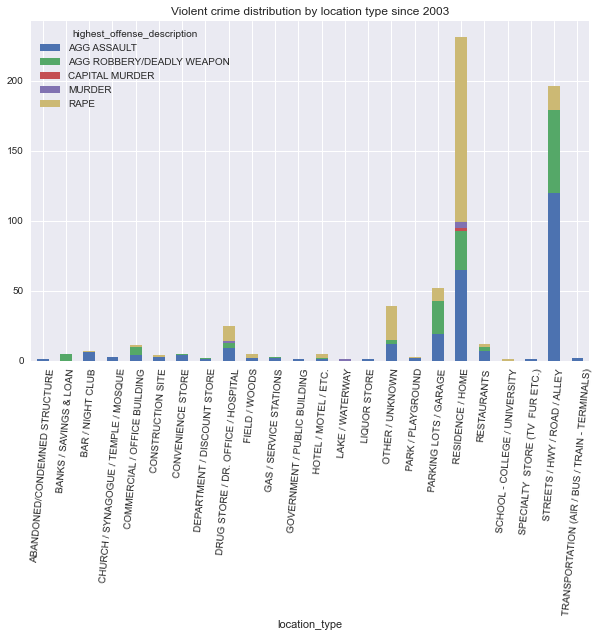

----------------------------------------------------------
----------------------------------------------------------


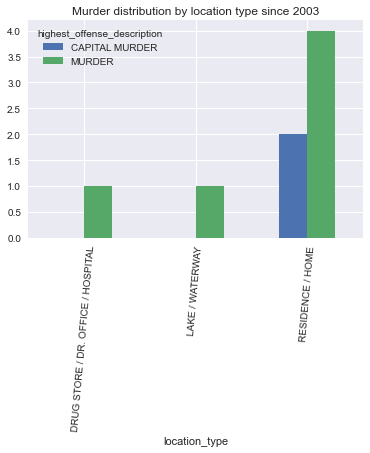

In [10]:
# Showing violent crime and murder rates by location type
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)

print("----------------------------------------------------------")
print("----------------------------------------------------------")

mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

viol_loc.plot.bar(
    stacked=True,
    figsize=(10, 6.25),
    # logy=True,
    rot=85,
    title="Violent crime distribution by location type since 2003",
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

mur_loc.plot.bar(rot=85, title="Murder distribution by location type since 2003")
plt.show()

In [11]:
# Show addresses with 5 or more reported violent crimes
display(df_viol.address.value_counts().head(8))

# Show addresses where murders occurred 
display(df_viol_mur.address.value_counts())

900 BLOCK E 32ND ST          54
919 E 32ND ST                36
2510 LEON ST                  8
600 BLOCK W 26TH ST           7
600 W 26TH ST                 7
2400 BLOCK SAN GABRIEL ST     6
1200 BLOCK W 38TH ST          6
500 BLOCK W 22ND ST           5
Name: address, dtype: int64

3102 1/2 KING ST       1
W 30TH ST / EAST DR    1
3303 LIBERTY ST        1
900 E 30TH ST          1
510 W 26TH ST          1
2812 NUECES ST         1
2529 RIO GRANDE ST     1
904 W 21ST ST          1
Name: address, dtype: int64

In [12]:
df.clearance_status.value_counts(normalize=True)

N    0.682952
C    0.285056
O    0.031992
Name: clearance_status, dtype: float64

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


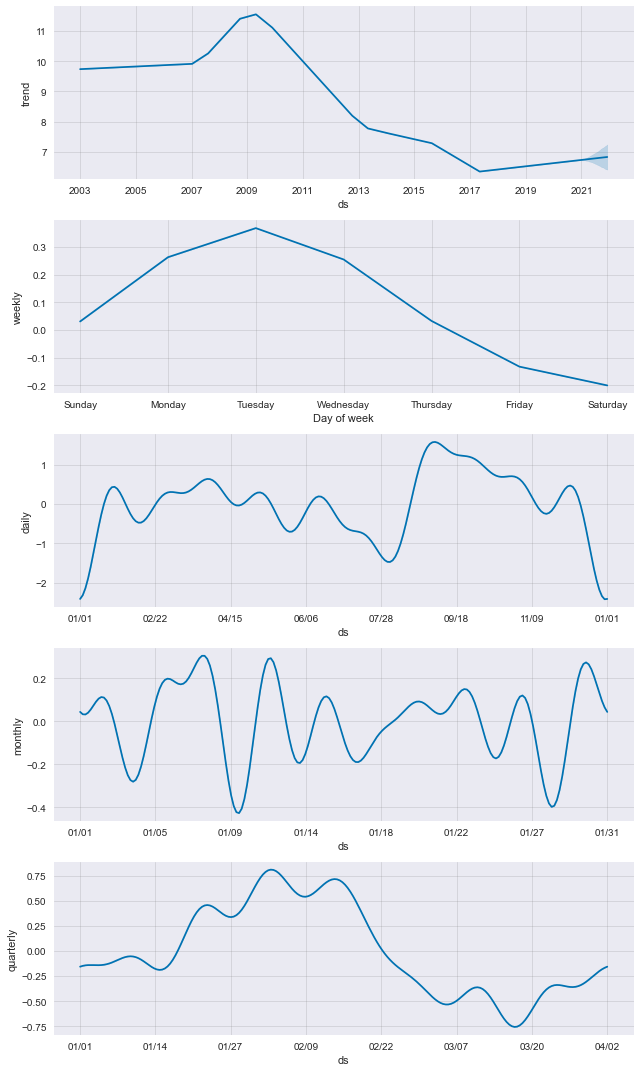

In [13]:
df_fbprophet = df

df_m = df_fbprophet.resample("D").size().reset_index()
df_m.columns = ["date", "daily_crime_count"]
df_m_final = df_m.rename(columns={"date": "ds", "daily_crime_count": "y"})

m = Prophet(interval_width=0.95, yearly_seasonality=False)
m.add_seasonality(name="monthly", period=30.5, fourier_order=10)
m.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
m.add_seasonality(name="weekly", period=52, fourier_order=10)
m.add_seasonality(name="daily", period=365, fourier_order=10)
m.fit(df_m_final)

future = m.make_future_dataframe(periods=365, freq="D")
pred = m.predict(future)

fig2 = m.plot_components(pred)
fig2_1 = plot_plotly(m, pred)
fig2_1

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


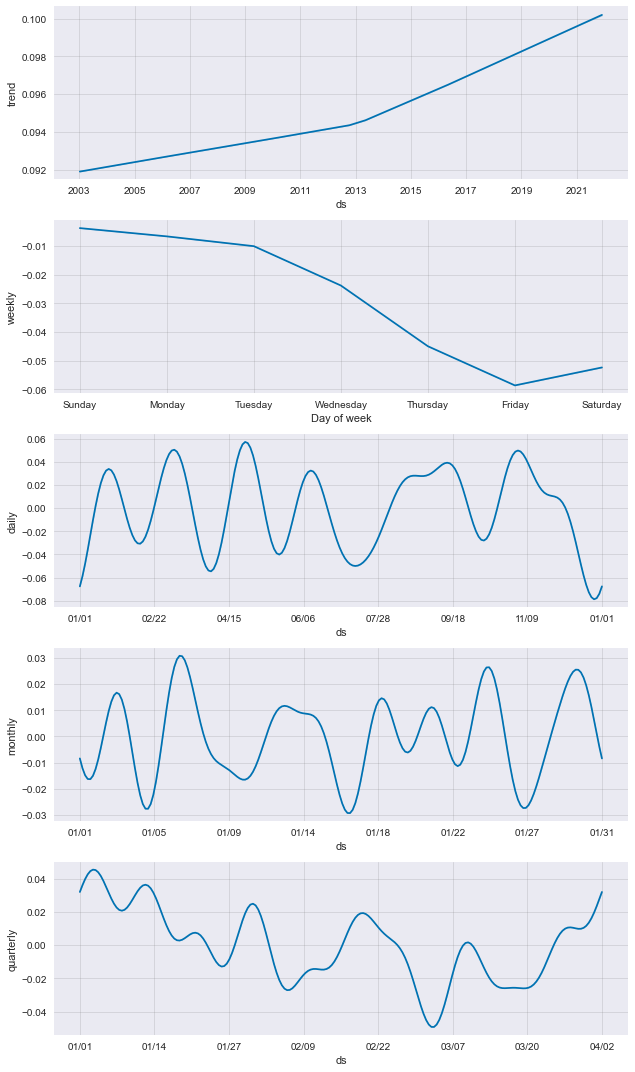

In [14]:
df_viol_fbprophet = df_viol

df_viol_n = df_viol_fbprophet.resample("D").size().reset_index()
df_viol_n.columns = ["date", "daily_crime_count"]
df_viol_n_final = df_viol_n.rename(columns={"date": "ds", "daily_crime_count": "y"})

n = Prophet(interval_width=0.95, yearly_seasonality=False)
n.add_seasonality(name="monthly", period=30.5, fourier_order=10)
n.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
n.add_seasonality(name="weekly", period=52, fourier_order=10)
n.add_seasonality(name="daily", period=365, fourier_order=10)
n.fit(df_viol_n_final)

future = n.make_future_dataframe(periods=365, freq="D")
pred = n.predict(future)

fig3 = n.plot_components(pred)
fig3_1 = plot_plotly(n, pred)
fig3_1